In [ ]:
# from sonpy import son

# help(son)
# f = son.File(filename)

# fid = open(filename)
# from numpy import fromfile
# fid.seek(0)

# fromfile(fid, 'h', 1)

# f.chan_list()


In [ ]:
from neo.io import Spike2IO
import numpy as np

# f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Step/S30/error_magnitude/S30_1_45degErrorTest Lost CS short.smr'
f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091608/B091608_1218_Adapt.smr'
# f_name = '/mnt/data/herzfeldd/neurophys/robi_yoshiko/2006_P-cells/Oscar U88_1 two kinds of cs/OscarU88_1LFW5RBW5_c.smr'
reader = Spike2IO(filename=f_name)

In [ ]:
reader.read()

In [ ]:
print('Supported objects:')
Spike2IO.supported_objects

In [ ]:
print('Readable objects:')
Spike2IO.readable_objects

In [ ]:
seg = reader.read_segment()


In [ ]:
bl = reader.read_block()
sgs = bl.segments
sg = sgs[0]
sg.analogsignals


In [ ]:
st = seg.spiketrains[0]
print(st.annotations)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib

In [ ]:
# Plot spike trains (Raster plot)

plt.figure(figsize=(18,1))
plt.eventplot(st)
plt.xlim((st.t_start, st.t_stop))

In [ ]:
print(st[-1])
print(st.t_stop)

In [ ]:
from smr import File


In [ ]:
fff = File(f_name)
fff.read_channels()

In [ ]:
ch = fff.get_channel(0)
data = ch.data
print(data.shape)

In [ ]:
chans = fff.channels

for chan in chans:
    print("{}: {}".format(chan.channel_number , chan.comment))
    print('kind: {}'.format(chan.kind))
    print("{} ({})".format(chan.title , chan.units))
    print('--------------------')
    
# chans[0].__dict__

In [ ]:
t = np.arange(0,data.shape[0])


In [ ]:
plt.figure(figsize=(30,2))

plt.plot(ch.data)



In [ ]:
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

frame_l = 120

frame_interval = 1
maxn = 360

x = data[0 : maxn]
t = np.arange(0,x.shape[0])

ymax = np.max(x)
ymin = np.min(x)

counter = [0]

fig = plt.figure(figsize=(15 , 2))

def animate(n):
    plt.cla()
    line = plt.plot(t[ counter[-1] :  counter[-1] + frame_l], x[counter[-1] :  counter[-1] + frame_l], color='g')
    counter.append(n*frame_interval)
        
    
    plt.ylim(ymax, ymin)
    return line

anim = animation.FuncAnimation(fig, animate, frames=(maxn - frame_l)/frame_interval, interval=25)

HTML(anim.to_jshtml())

In [ ]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
    
import fnmatch
import os
from neo.io import Spike2IO
from kaveh.toolbox import closest_argmin


source_path = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/'
# target_path = '/mnt/data/kkarbasi/robi_yoshiko_data_py/raw_data/'
for root, dirnames, filenames in os.walk(source_path):
    for f_name in filenames:
        if f_name.endswith('smr'):
            neo_reader = Spike2IO(filename=os.path.join(root,f_name))
            neo_data = neo_reader.read()
            data_block = neo_data[0]
            seg = data_block.segments[0]
            if len(seg.spiketrains) != 0:
                print(os.path.join(root,f_name))
                for st in seg.spiketrains:
                    print(st.shape)
                    print('--')
                print('----------------------')
            

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from smr import File
smr_content = File('../data/mouse_data/T124_190506_01b_1.smr')
smr_content.read_channels()
voltage_chan = smr_content.get_channel(0)

In [3]:
voltage_chan.

0.0

Not implemented (type = 6)
Not implemented (type = 5)


<IPython.core.display.Javascript object>


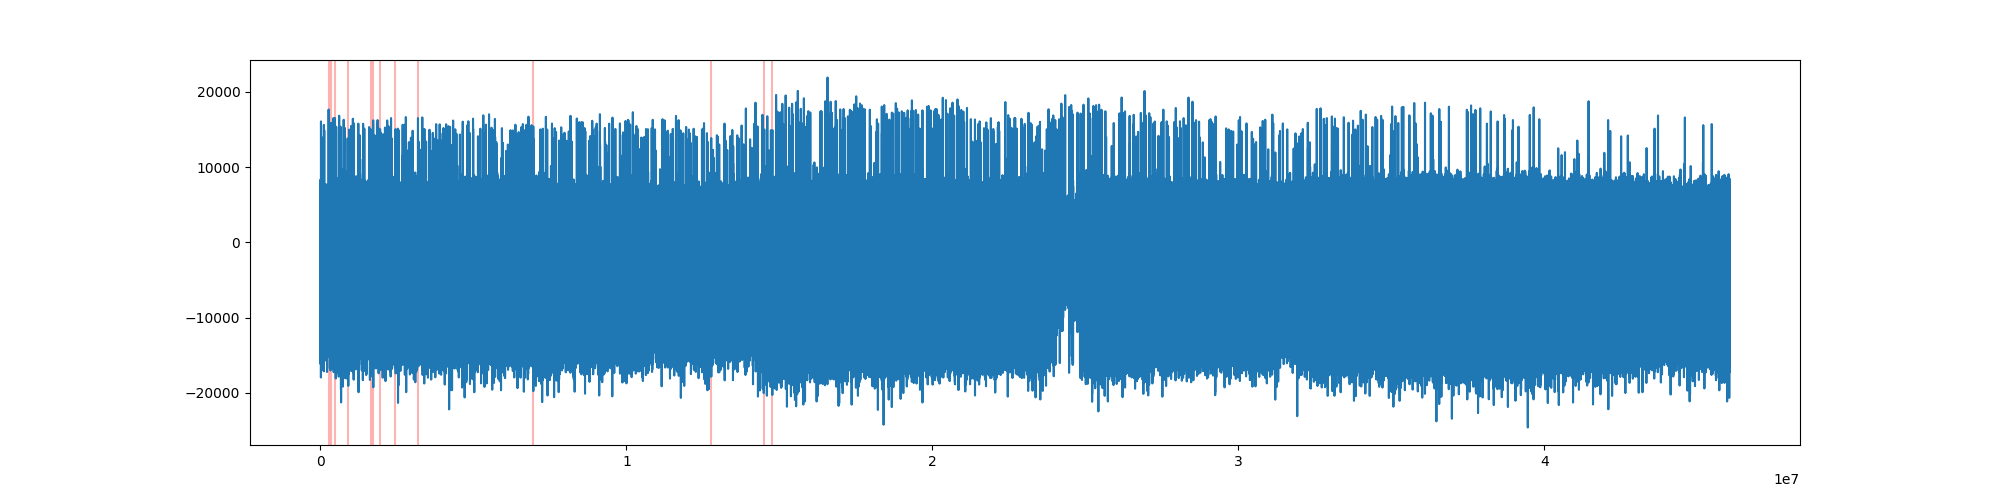

In [5]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
from smr import File
from kaveh.plots import axvlines
from neo.io import Spike2IO
import numpy as np
from matplotlib import pyplot as plt 
from kaveh.sorting import spikesorter
from kaveh.toolbox import find_file
import csv
import os

f_names= ['/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K48/error_direction/K48_1_CSddirTuning.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K48/error_direction/K48_2_CSddirTuning.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K69/error_direction/K69_1_DirTuning.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K69/error_magnitude/K69_1_ErrorSize45degDir.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K16/error_direction/K16_2_directionaltest.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K45/error_direction/K45_1_ErrorDirectionTest.smr',
         '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K45/error_magnitude/K45_1_ErrorSizetest315degDir.smr',
          '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Step/S38/error_direction/S38_1_directionaltuning.smr',
          '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O62/O62_1_FW5R_BW5L_A.smr',
          '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O62/O62_1_pre.smr',
         ]

cs_spiketrain_idx = [2, 1, 1, 2, 0, 1, 1, 1, 2, 0]

f_name = f_names[8]



smr_content = File(f_name)
smr_content.read_channels()
voltage_chan = smr_content.get_channel(0)

cs_path = '/mnt/data/temp/kaveh/auto_processed/' 
cf = find_file(os.path.split(f_name)[1] + '.pkl', cs_path)
with open(cf, 'rb') as input:
    sss = pickle.load(input)
sss.voltage = voltage_chan.data
neo_reader = Spike2IO(filename=f_name)
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]
# Assuming cs spike trains are saved in the 0th index of spike train channels
cs_indices = np.array(seg.spiketrains[cs_spiketrain_idx[8] - 2])
cs_indices = np.int32(cs_indices/sss.dt)

plt.close('all')
plt.figure(figsize=(20,5))

plt.plot(voltage_chan.data)
axvlines(plt.gca(), cs_indices, color = 'r', alpha = 0.3)
# cs_indices = np.array(seg.spiketrains[cs_spiketrain_idx[5]])
# cs_indices = np.int32(cs_indices/sss.dt)
# axvlines(plt.gca(), cs_indices, color = 'y', alpha = 0.7)

In [3]:
import scipy.fftpack
import pywt

In [2]:
pywt.dw